In [9]:
import pandas as pd
from src.helpers.plotters import *


df = pd.read_csv(r'cleaned/output_cleaned_full.csv')
df.head()

,fuel_type,gearbox,mileage [km],model,name,place,price [pln],seller_type,year,engine_capacity [cm3],horsepower [km],additional_specification,is_gearbox_automatic,region
0,Benzyna,Manualna,62000,Abarth,Abarth 595,Bydgoszcz (Kujawsko-pomorskie),63000,Prywatny sprzedawca,2019,1368,145,Abarth 595 70th Aniversario 2019/2020 - pierws...,0,Kujawsko-pomorskie
1,Benzyna,Manualna,56800,Abarth,Abarth 695,Bielsko-Biała (Śląskie),99000,Prywatny sprzedawca,2018,1368,165,ABARTH 695C XSR YAMAHA cabriolet Akrapovic CES...,0,Śląskie
2,Benzyna,Manualna,59000,Abarth,Abarth 595,Warszawa (Mazowieckie),71000,Prywatny sprzedawca,2018,1368,165,Abarth 595 - 165 KM | 59 000 km | Oryginalny w...,0,Mazowieckie
3,Benzyna,Manualna,80089,Abarth,Abarth 595,Jaworze (Śląskie),59500,Prywatny sprzedawca,2016,1368,164,fiat 500 Abarth C w wersji 595 Turismo (cabrio...,0,Śląskie
4,Benzyna,Manualna,33000,Abarth,Abarth 595,Wojcieszów (Dolnośląskie),70000,Anonimowy sprzedawca,2021,1368,145,Bardzo ładny ABARTH 595 w wyjątkowej stylizacj...,0,Dolnośląskie


In [10]:
df_encoded = pd.read_csv(r'cleaned/output_encoded.csv')
df_encoded.head()

,fuel_type,mileage [km],model,name,price [pln],seller_type,year,engine_capacity [cm3],horsepower [km],is_gearbox_automatic,region
0,178162.801039,62000,101613.193302,85505.357299,63000,90852.118289,2019,1368,145,0,80689.855237
1,178162.801039,56800,101613.193302,133323.671059,99000,90852.118289,2018,1368,165,0,128266.815789
2,178162.801039,59000,101613.193302,85505.357299,71000,90852.118289,2018,1368,165,0,215862.601274
3,178162.801039,80089,101613.193302,85505.357299,59500,90852.118289,2016,1368,164,0,128266.815789
4,178162.801039,33000,101613.193302,85505.357299,70000,265742.166860,2021,1368,145,0,104437.423222


In [11]:
fuel_type = df['fuel_type'].value_counts().reset_index()
plotly_pie(fuel_type, values="count", names="fuel_type", title="Fuel Type")

In [12]:
gearbox = df['gearbox'].value_counts().reset_index()
plotly_pie(gearbox, values="count", names="gearbox", title="Gearbox")

In [13]:
df['price_quartile'] = pd.qcut(df['price [pln]'], q=4)

quartile_counts = df['price_quartile'].value_counts().sort_index()
quartile_df = pd.DataFrame({
    'Quartile': [str(interval) for interval in quartile_counts.index],
    'Count': quartile_counts.values
})

plotly_bar(
    df=quartile_df,
    x_axis='Quartile',
    y_axis='Count',
    title='Rozkład cen według kwartyli',
    x_axis_title='Kwartyla ceny (PLN)',
    y_axis_title='Liczba obserwacji'
)

In [14]:
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

plotly_bar(
    df=region_counts,
    x_axis='region',
    y_axis='count',
    title='Liczba ogłoszeń w województwach',
    x_axis_title='Województwo',
    y_axis_title='Liczba ogłoszeń'
)

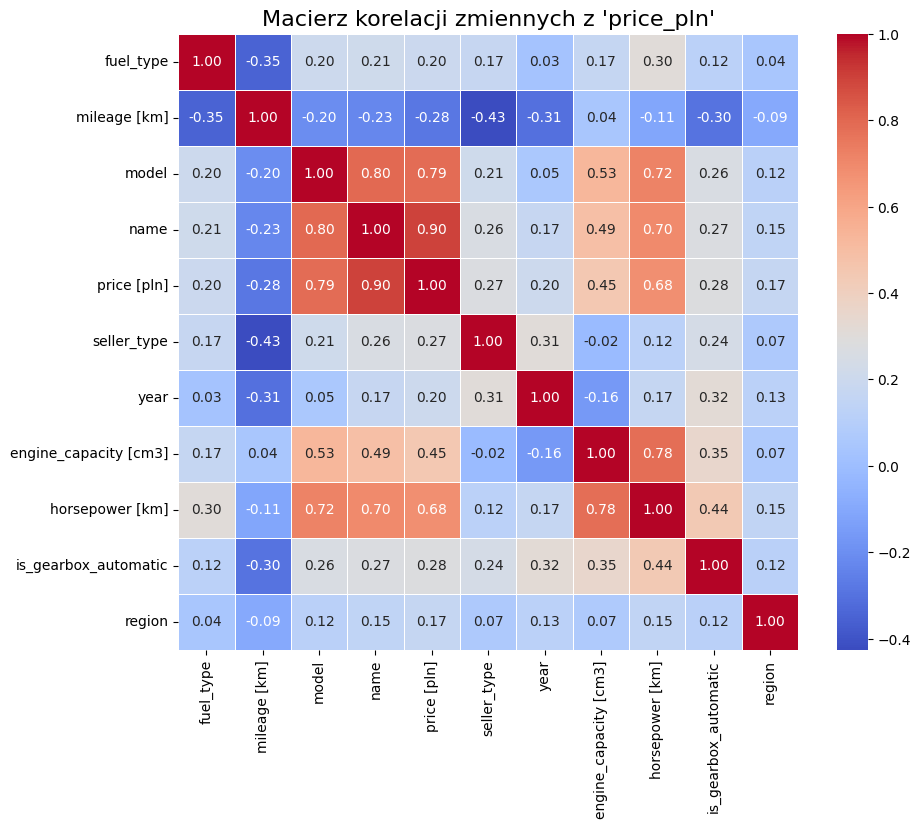

In [15]:
plot_corr_matrix(df_encoded, fig_width=10, fig_height=8)